In [26]:
import numpy as np
import pandas as pd

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
class Perceptron(object):
    '''
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ----------
    w_ : 1d-array
        weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
    '''
    def __init__(self, eta=.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X,y):
        '''
        Fit Training data. 
        
        Parameters:
        -----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is # samples
            and n_features is # features
        y: array-like, shape = n_samples
            Target Values
        
        Returns
        -------
        
        self : object
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''Calculate Net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0,1,-1)

In [42]:
df = pd.read_csv('/Users/danielbillmann/seaborn-data/iris.csv',header=None)

In [47]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [48]:
y = df.iloc[0:100,4].values

In [49]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [50]:
X = df.iloc[0:100, [0,2]].values

In [51]:
#
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
df = pd.DataFrame(sns.load_dataset('iris'))

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


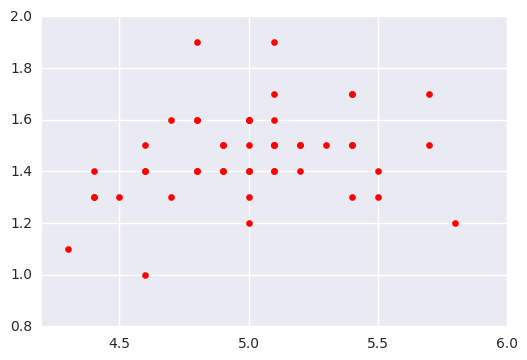

In [62]:
setosa = plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='o', label='Setosa')

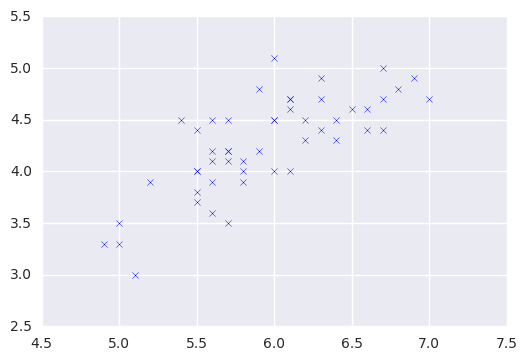

In [63]:
versicolor = plt.scatter(X[50:100, 0],X[50:100, 1], color = 'blue', marker='x', label='versicolor')

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


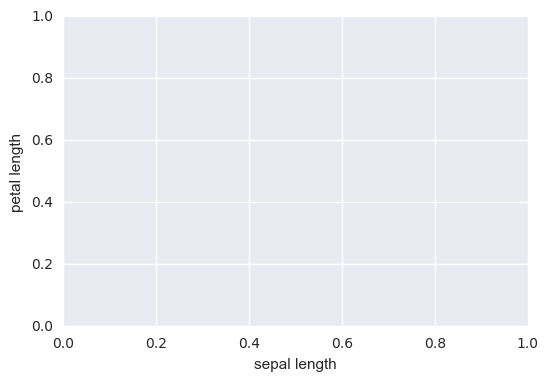

In [58]:
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')


In [60]:
plt.plot()